In [24]:
#importamos algunas librerías necesarias
import pandas as pd  #
import numpy as np
from datetime import datetime


## 1 - Importamos el dataset con el que vamos a trabajar

In [25]:
# df = pd.read_csv('https://catalogodatos.gub.uy/dataset/2ed18ffb-074c-472a-800e-324388ec0c7a/resource/3a7cfb1a-102a-4d2b-994f-5013bf2ce772/download/rupe-enero-2021.csv', delimiter=';',warn_bad_lines = False, error_bad_lines=False, encoding='iso-8859-1')
df = pd.read_csv('https://catalogodatos.gub.uy/dataset/2ed18ffb-074c-472a-800e-324388ec0c7a/resource/3a7cfb1a-102a-4d2b-994f-5013bf2ce772/download/rupe-enero-2021.csv', delimiter=';', encoding='iso-8859-1')

## 2 - Exploramos el data frame

In [26]:
df.shape

(81624, 7)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81624 entries, 0 to 81623
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   pais_prov                 81624 non-null  object
 1   identificacion_prov       81624 non-null  object
 2   denominacion_social_prov  81616 non-null  object
 3   domicilio_fiscal          68208 non-null  object
 4   localidad_prov            47582 non-null  object
 5   departamento_prov         49615 non-null  object
 6   estado_prov               81624 non-null  object
dtypes: object(7)
memory usage: 4.4+ MB


In [28]:
df.head(10)

,pais_prov,identificacion_prov,denominacion_social_prov,domicilio_fiscal,localidad_prov,departamento_prov,estado_prov
0,URUGUAY,214837960013,TRINIDAD SCOLNIK LEONARDO MIGUEL,LARRAVIDE 2261,MONTEVIDEO,Montevideo,EN INGRESO
1,URUGUAY,216772580013,IYOLIC SOCIEDAD ANONIMA,BLANCA DEL TABARE 2941,MONTEVIDEO,Montevideo,EN INGRESO
2,URUGUAY,213033680013,ABILTEX S A,MAYO GUTIERREZ CESAR 2778,MONTEVIDEO,Montevideo,EN INGRESO
3,URUGUAY,216824960016,HOGAR MUEBLES SRL,REVUELTA DR. JOSE 3673,MONTEVIDEO,Montevideo,EN INGRESO
4,URUGUAY,217224350010,LOIS PEREZ DIEGO EDUARDO,CHAMIZO 4232,MONTEVIDEO,Montevideo,EN INGRESO
5,URUGUAY,215744870012,CENTRO INTERINSTITUCIONAL DE COLABORACION CON,MINAS 1877,MONTEVIDEO,Montevideo,EN INGRESO
6,URUGUAY,010165650017,COOPERATIVA DE AHORRO Y CREDITO DEL NORTE,"LECUEDER, CNEL. CARLOS 209",ARTIGAS,Artigas,EN INGRESO
7,URUGUAY,213999180015,INTISOL S R L,HERRERA Y REISSIG AVDA. JULIO 736,MONTEVIDEO,Montevideo,EN INGRESO
8,URUGUAY,216753290013,OVERSEASOLUTIONS S.R.L.,GABOTO 1119,MONTEVIDEO,Montevideo,EN INGRESO
9,URUGUAY,217169950015,LOPEZ PERDIGON GABRIELA CARMEN,CANDELARIA 1739,MONTEVIDEO,Montevideo,EN INGRESO


In [29]:
df.describe()

,pais_prov,identificacion_prov,denominacion_social_prov,domicilio_fiscal,localidad_prov,departamento_prov,estado_prov
count,81624,81624,81616,68208,47582,49615,81624
unique,73,81617,81541,54870,654,19,4
top,URUGUAY,200052,KARMA S R L,0,MONTEVIDEO,Montevideo,ACTIVO
freq,79567,2,2,3139,28316,30029,39583


## 3 - Como medir el tiempo de un proceso 

In [30]:
import time
antes = datetime.now()  # time.time()

#Aqui el proceso que queremos ejecutar  
for i in range(0,100000):
  pass  

despues = datetime.now()  # time.time() #
diff = despues - antes

print ("La diferencia: " + str(diff))

La diferencia: 0:00:00.018311


## 4 - Iterar el dataframe fila a fila (Caso #1)

In [31]:
antes = datetime.now()
temp=[]
for i,row in df.iterrows():
  street_new = row['domicilio_fiscal']
  temp.append(street_new)
despues = datetime.now()
diff = despues - antes
print ("La diferencia: " + str(diff))

La diferencia: 0:00:17.336888


In [32]:
temp[0:10]

['LARRAVIDE 2261',
 'BLANCA DEL TABARE 2941',
 'MAYO GUTIERREZ CESAR 2778',
 'REVUELTA DR. JOSE 3673',
 'CHAMIZO 4232',
 'MINAS 1877',
 'LECUEDER, CNEL. CARLOS 209',
 'HERRERA Y REISSIG AVDA. JULIO 736',
 'GABOTO 1119',
 'CANDELARIA 1739']

In [33]:
resultado = pd.DataFrame(columns=['Tipo_Test','Tiempo'])
resultado.head()

,Tipo_Test,Tiempo


In [34]:
#resultado = resultado.append({'Tipo_Test':'Iterar por filas','Tiempo':diff},ignore_index=1)
resultado = pd.concat([resultado, pd.DataFrame({'Tipo_Test': ['Iterar por filas'],'Tiempo':[diff]})],ignore_index= True)

C:\Users\carlos\AppData\Local\Temp\ipykernel_12028\3484784304.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultado = pd.concat([resultado, pd.DataFrame({'Tipo_Test': ['Iterar por filas'],'Tiempo':[diff]})],ignore_index= True)


## 5 - Iterar el dataframe por el indice (Caso #2)

In [35]:
# Cuantas filas tiene mi dataframe?
df.shape

(81624, 7)

In [36]:
len(df)

81624

In [37]:
antes = datetime.now()
temp=[]
for idx in range(0,len(df)):
  street_new = df['domicilio_fiscal'].iloc[idx]
  temp.append(street_new)
despues = datetime.now()
diff = despues - antes
print ("La diferencia: " + str(diff))
resultado = pd.concat([resultado,pd.DataFrame({'Tipo_Test':['Iterar por indice'],'Tiempo':[diff]})],ignore_index= True)


La diferencia: 0:00:03.658119


In [38]:
temp[0:10]

['LARRAVIDE 2261',
 'BLANCA DEL TABARE 2941',
 'MAYO GUTIERREZ CESAR 2778',
 'REVUELTA DR. JOSE 3673',
 'CHAMIZO 4232',
 'MINAS 1877',
 'LECUEDER, CNEL. CARLOS 209',
 'HERRERA Y REISSIG AVDA. JULIO 736',
 'GABOTO 1119',
 'CANDELARIA 1739']

## 6 - Iterar desde un diccionario (Caso #3)

In [39]:
df_dict = df.to_dict('records')
antes = datetime.now()
temp=[]
for row in df_dict:
  street_new = row['domicilio_fiscal']
  temp.append(street_new)
despues = datetime.now()
diff = despues - antes
print ("La diferencia: " + str(diff))
#resultado = resultado.append({'Tipo_Test':'Iterar desde un diccionario','Tiempo':diff},ignore_index=1)
resultado = pd.concat([resultado, pd.DataFrame({'Tipo_Test': ['Iterar desde un diccionario'],'Tiempo':[diff]})],ignore_index= True)

La diferencia: 0:00:00.042078


In [40]:
temp[0:10]

['LARRAVIDE 2261',
 'BLANCA DEL TABARE 2941',
 'MAYO GUTIERREZ CESAR 2778',
 'REVUELTA DR. JOSE 3673',
 'CHAMIZO 4232',
 'MINAS 1877',
 'LECUEDER, CNEL. CARLOS 209',
 'HERRERA Y REISSIG AVDA. JULIO 736',
 'GABOTO 1119',
 'CANDELARIA 1739']

7 - Iterar con una funcion lambda (Caso #4)

In [41]:
df_dict = df.to_dict('records')
antes = datetime.now()
temp = df['domicilio_fiscal'].apply(lambda x: x)
despues = datetime.now()
diff = despues - antes
print ("La diferencia: " + str(diff))
#resultado = resultado.append({'Tipo_Test':'Iterar con funcion lambda','Tiempo':diff},ignore_index=1)
resultado = pd.concat([resultado, pd.DataFrame({'Tipo_Test': ['Iterar con funcion lambda'], 'Tiempo': [diff]})],ignore_index= True)

La diferencia: 0:00:00.034121


In [42]:
temp[0:10]

0                       LARRAVIDE 2261
1               BLANCA DEL TABARE 2941
2            MAYO GUTIERREZ CESAR 2778
3               REVUELTA DR. JOSE 3673
4                         CHAMIZO 4232
5                           MINAS 1877
6           LECUEDER, CNEL. CARLOS 209
7    HERRERA Y REISSIG AVDA. JULIO 736
8                          GABOTO 1119
9                      CANDELARIA 1739
Name: domicilio_fiscal, dtype: object

## 8 - Veamos el resultado 

In [43]:
resultado.head()

,Tipo_Test,Tiempo
0,Iterar por filas,0 days 00:00:17.336888
1,Iterar por indice,0 days 00:00:03.658119
2,Iterar desde un diccionario,0 days 00:00:00.042078
3,Iterar con funcion lambda,0 days 00:00:00.034121


In [44]:
resultado.index

RangeIndex(start=0, stop=4, step=1)

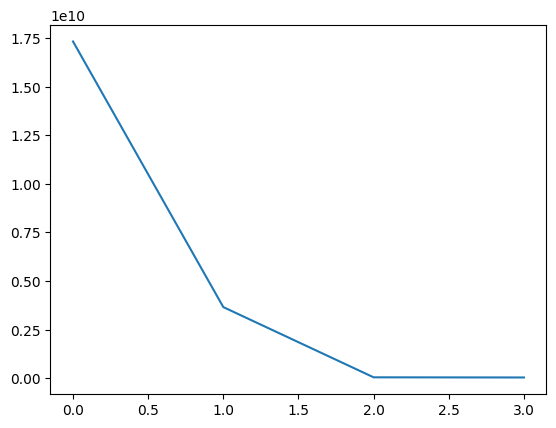

In [45]:
resultado['Tiempo'].plot();   #resultado.set_index('Tipo_Test')['Tiempo'].plot();